<a href="https://colab.research.google.com/github/dipakd21/first/blob/main/EDA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Task
Explain the steps for Exploratory Data Analysis (EDA) on the provided dataset.

## Understand the data

### Subtask:
Display the first few rows of the DataFrame, check the data types of each column, and get a summary of the dataset's dimensions (number of rows and columns).


**Reasoning**:
Display the first few rows, check data types, and get the shape of the DataFrame as requested by the subtask.



In [5]:
display(df.head())
display(df.info())
display(df.shape)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


None

(50, 5)

## Handle missing values

### Subtask:
Check for missing values in each column and decide on a strategy to handle them (e.g., imputation, dropping rows/columns).


**Reasoning**:
Check for missing values in each column and display the sum of missing values.



In [6]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


## Analyze descriptive statistics

### Subtask:
Generate descriptive statistics for numerical columns (mean, median, standard deviation, etc.) and frequency counts for categorical columns.


**Reasoning**:
Generate descriptive statistics for numerical columns and frequency counts for the categorical column 'State' to understand the distribution and unique values in the dataset.



In [7]:
display("Descriptive statistics for numerical columns:")
display(df.describe())
display("Frequency counts for 'State' column:")
display(df['State'].value_counts())

'Descriptive statistics for numerical columns:'

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


"Frequency counts for 'State' column:"

,count
State,
New York,17
California,17
Florida,16


## Visualize the data

### Subtask:
Create visualizations to understand the distribution of individual variables and the relationships between variables (e.g., histograms, box plots, scatter plots, correlation matrix).


**Reasoning**:
Generate visualizations to understand the distribution of individual variables and the relationships between variables. This includes histograms for numerical distributions, a box plot for profit distribution, scatter plots for relationships between profit and spend/administration, and a heatmap for the correlation matrix.



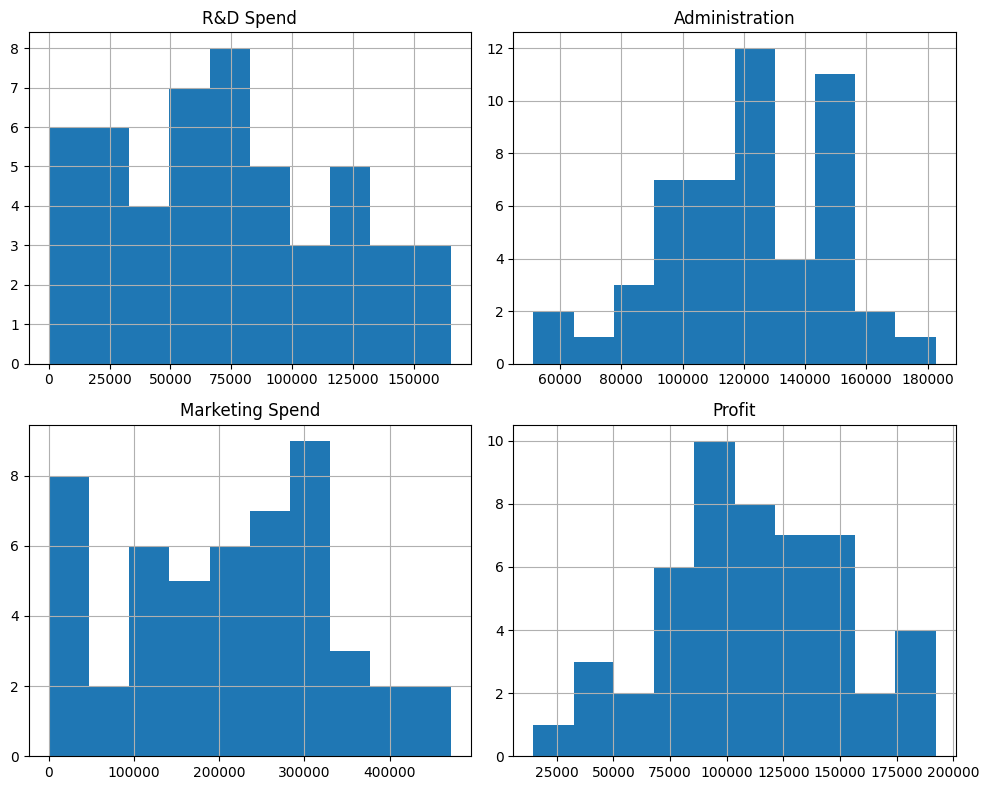

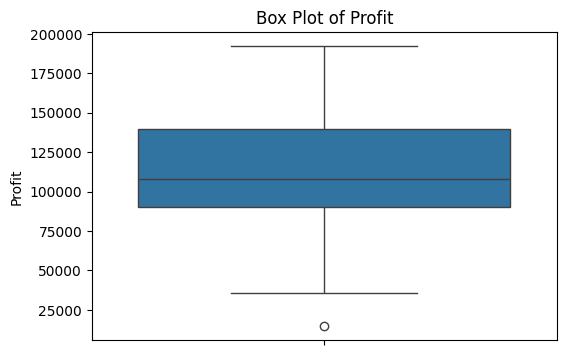

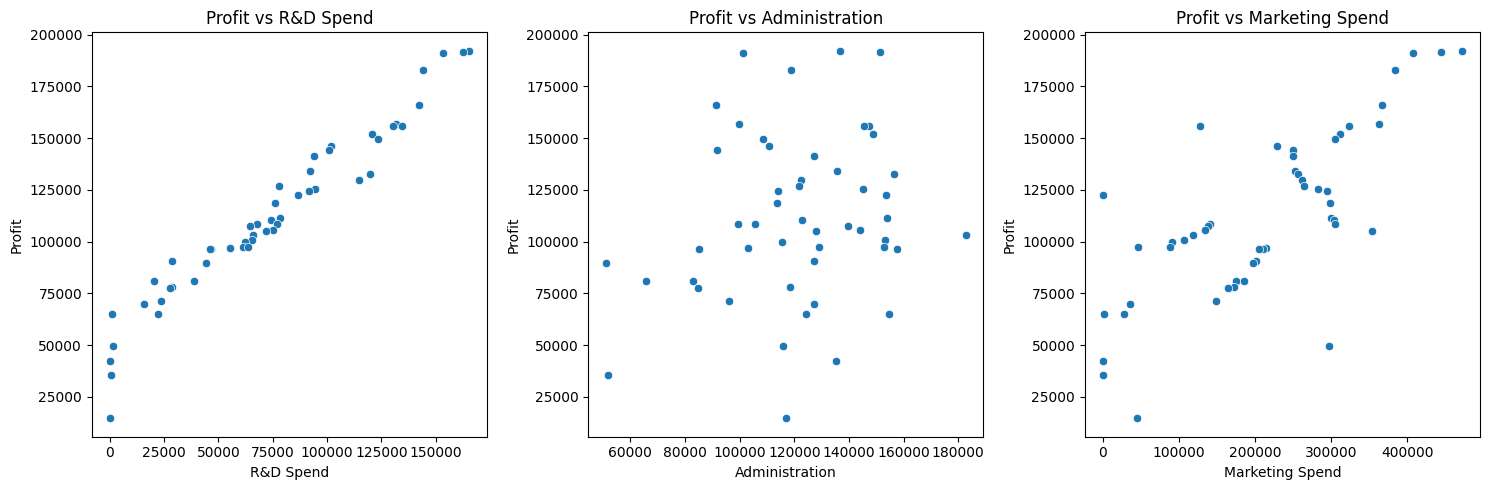

'Correlation Matrix:'

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


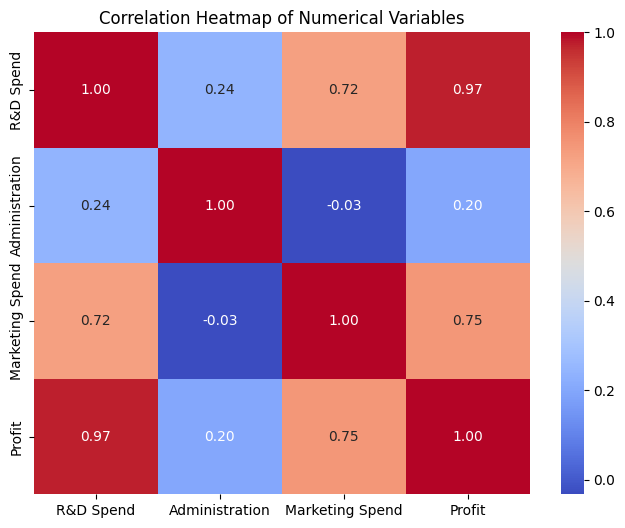

In [8]:
numerical_cols = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

# Histograms for numerical columns
df[numerical_cols].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Box plot for Profit
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Profit'])
plt.title('Box Plot of Profit')
plt.show()

# Scatter plots
plt.figure(figsize=(15, 5))
for i, col in enumerate(['R&D Spend', 'Administration', 'Marketing Spend']):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=df[col], y=df['Profit'])
    plt.title(f'Profit vs {col}')
plt.tight_layout()
plt.show()

# Correlation matrix and heatmap
correlation_matrix = df[numerical_cols].corr()
display("Correlation Matrix:")
display(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

## Identify outliers

### Subtask:
Use visualizations and statistical methods to identify and understand outliers in the data.


**Reasoning**:
Calculate the IQR, lower and upper bounds for 'Profit' and identify the outliers based on the 1.5*IQR rule, then display the identified outliers.



In [9]:
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Profit'] < lower_bound) | (df['Profit'] > upper_bound)]

print("Identified Outliers in 'Profit' column:")
display(outliers)

Identified Outliers in 'Profit' column:


,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


## Explore relationships between variables

### Subtask:
Investigate how different variables relate to each other, particularly focusing on the relationship between features and the target variable (Profit in this case).


**Reasoning**:
Based on the instructions and the previous steps, I need to analyze the relationships between variables, including both numerical and the categorical variable 'State', and the target variable 'Profit'. This involves examining existing scatter plots and correlation matrix and creating a box plot for 'State' vs 'Profit' to visualize their relationship. Finally, I will summarize the findings.



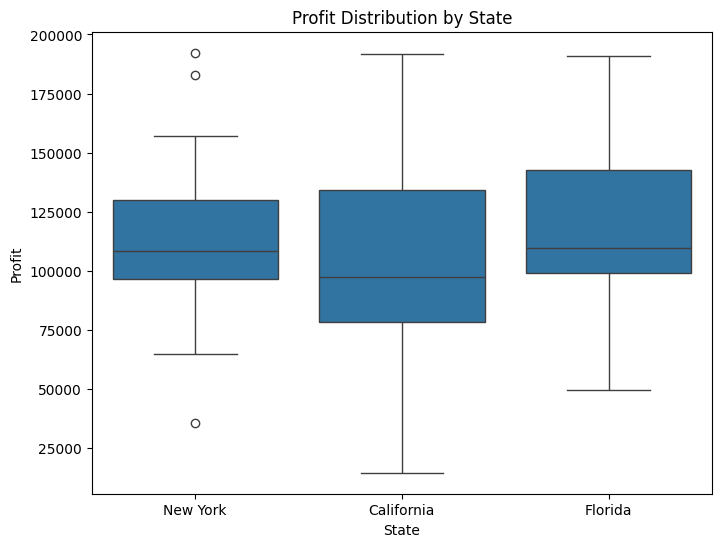

Relationship Analysis Summary:
1. Scatter plots: 'R&D Spend' shows a strong positive linear relationship with 'Profit'. 'Marketing Spend' shows a moderate positive linear relationship. 'Administration' shows a weak or no clear linear relationship.
2. Correlation matrix: The correlation between 'Profit' and 'R&D Spend' is 0.97, indicating a strong positive correlation. The correlation between 'Profit' and 'Marketing Spend' is 0.75, indicating a moderate positive correlation. The correlation between 'Profit' and 'Administration' is 0.20, indicating a weak positive correlation.
3. Box plot of Profit by State: The box plot shows that the distribution of profit is similar across different states (New York, California, Florida), with no significant visual differences in median or spread. This suggests 'State' might not be a strong predictor of 'Profit' on its own, but further investigation with more data or different methods might be needed.

Overall, 'R&D Spend' appears to have the stronges

In [10]:
# Box plot for State vs Profit
plt.figure(figsize=(8, 6))
sns.boxplot(x='State', y='Profit', data=df)
plt.title('Profit Distribution by State')
plt.show()

# Summarize relationships
print("Relationship Analysis Summary:")
print("1. Scatter plots: 'R&D Spend' shows a strong positive linear relationship with 'Profit'. 'Marketing Spend' shows a moderate positive linear relationship. 'Administration' shows a weak or no clear linear relationship.")
print(f"2. Correlation matrix: The correlation between 'Profit' and 'R&D Spend' is {correlation_matrix.loc['Profit', 'R&D Spend']:.2f}, indicating a strong positive correlation. The correlation between 'Profit' and 'Marketing Spend' is {correlation_matrix.loc['Profit', 'Marketing Spend']:.2f}, indicating a moderate positive correlation. The correlation between 'Profit' and 'Administration' is {correlation_matrix.loc['Profit', 'Administration']:.2f}, indicating a weak positive correlation.")
print("3. Box plot of Profit by State: The box plot shows that the distribution of profit is similar across different states (New York, California, Florida), with no significant visual differences in median or spread. This suggests 'State' might not be a strong predictor of 'Profit' on its own, but further investigation with more data or different methods might be needed.")
print("\nOverall, 'R&D Spend' appears to have the strongest positive influence on 'Profit', followed by 'Marketing Spend'. 'Administration' and 'State' seem to have less direct linear impact on 'Profit' based on this initial analysis.")

## Handle categorical variables

### Subtask:
If there are categorical variables, explore their unique values and consider encoding strategies if necessary for modeling.


**Reasoning**:
Identify and explore the unique values of the categorical column 'State' to understand the categories present and consider potential encoding strategies.



In [11]:
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical columns identified:")
print(categorical_cols)

for col in categorical_cols:
    num_unique = df[col].nunique()
    print(f"\nColumn '{col}':")
    print(f"Number of unique values: {num_unique}")
    if num_unique <= 10: # Display unique values if not too many
        print("Unique values:")
        display(df[col].unique())
    else:
        print("Unique values (first 10):")
        display(df[col].unique()[:10])

print("\nConsiderations for Encoding:")
print("The 'State' column is a nominal categorical variable with a small number of unique values (3).")
print("One-hot encoding is a suitable strategy to convert this categorical variable into numerical format for modeling, as it avoids implying any ordinal relationship between the states.")

Categorical columns identified:
Index(['State'], dtype='object')

Column 'State':
Number of unique values: 3
Unique values:


array(['New York', 'California', 'Florida'], dtype=object)


Considerations for Encoding:
The 'State' column is a nominal categorical variable with a small number of unique values (3).
One-hot encoding is a suitable strategy to convert this categorical variable into numerical format for modeling, as it avoids implying any ordinal relationship between the states.


## Summary:

### Data Analysis Key Findings

*   The dataset contains 50 rows and 5 columns, with no missing values.
*   Numerical columns ('R&D Spend', 'Administration', 'Marketing Spend', and 'Profit') are of float64 type, while the 'State' column is of object type, containing three unique categorical values: 'New York', 'California', and 'Florida'.
*   Descriptive statistics show the range and distribution of numerical variables. For instance, 'Profit' ranges from \$14681.40 to \$192261.83.
*   Visualizations and the correlation matrix indicate a strong positive correlation between 'Profit' and 'R&D Spend' (0.97), a moderate positive correlation with 'Marketing Spend' (0.75), and a weak positive correlation with 'Administration' (0.20).
*   A box plot for 'Profit' identified one potential outlier.
*   The distribution of 'Profit' appears similar across the three states.

### Insights or Next Steps

*   The strong correlation between 'R&D Spend' and 'Profit' suggests that investment in R&D is a primary driver of profitability in this dataset.
*   For modeling, the categorical 'State' column should be encoded using one-hot encoding to convert it into a numerical format suitable for most algorithms.


# Task
As a data analyst, perform the next steps after EDA, including preparing data for modeling, splitting data, selecting and training a model, evaluating the model, and interpreting model results.

## Prepare data for modeling

### Subtask:
Handle categorical variables by applying one-hot encoding.


**Reasoning**:
Identify the categorical column 'State' and apply one-hot encoding to it, dropping the first category to avoid multicollinearity, and store the result in a new DataFrame `df_encoded`.



In [12]:
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df_encoded.head())

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False


## Split data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Split the data into training and testing sets and print their shapes.



In [13]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Profit', axis=1)
y = df_encoded['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (40, 5)
Shape of X_test: (10, 5)
Shape of y_train: (40,)
Shape of y_test: (10,)


## Select and train a model

### Subtask:
Choose a suitable regression model (e.g., Linear Regression) and train it on the training data.


**Reasoning**:
Import the LinearRegression model, instantiate it, and fit it to the training data.



In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

### Subtask:
Evaluate the trained model's performance on the testing data using appropriate metrics (e.g., Mean Absolute Error, Mean Squared Error, R-squared).


**Reasoning**:
Calculate and print the MAE, MSE, and R-squared score of the model on the test data.



In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 6961.48
Mean Squared Error (MSE): 82010363.04
R-squared (R2): 0.90


## Interpret model results

### Subtask:
Analyze the model's coefficients or feature importance to understand which variables have the most significant impact on the target variable.


**Reasoning**:
Analyze the model's coefficients to understand the impact of each feature on the target variable (Profit) by pairing coefficients with feature names and printing them.



In [16]:
coefficients = model.coef_
feature_names = X_train.columns

coeff_series = pd.Series(coefficients, index=feature_names)

print("Model Coefficients:")
display(coeff_series)

print("\nInterpretation of Coefficients:")
print("A positive coefficient indicates that as the feature value increases, the predicted Profit is expected to increase, holding other features constant.")
print("A negative coefficient indicates that as the feature value increases, the predicted Profit is expected to decrease, holding other features constant.")
print("The magnitude of the coefficient indicates the strength of the impact. Larger absolute values suggest a stronger influence.")

Model Coefficients:


,0
R&D Spend,0.805630
Administration,-0.068788
Marketing Spend,0.029855
State_Florida,938.793006
State_New York,6.987760



Interpretation of Coefficients:
A positive coefficient indicates that as the feature value increases, the predicted Profit is expected to increase, holding other features constant.
A negative coefficient indicates that as the feature value increases, the predicted Profit is expected to decrease, holding other features constant.
The magnitude of the coefficient indicates the strength of the impact. Larger absolute values suggest a stronger influence.


## Summary:

### Data Analysis Key Findings

*   Categorical variables were handled by applying one-hot encoding to the 'State' column, and the first category was dropped to avoid multicollinearity.
*   The dataset was successfully split into training and testing sets with a test size of 20%.
*   A Linear Regression model was selected and trained on the training data.
*   The model achieved an R-squared score of 0.90 on the testing data, indicating that approximately 90% of the variance in Profit can be explained by the model.
*   The model coefficients reveal that 'R&D Spend' has the largest positive impact on Profit, followed by 'State\_Florida'. 'Administration' has a negative impact on Profit.

### Insights or Next Steps

*   The Linear Regression model shows promising performance with an R-squared of 0.90. Further analysis could involve exploring other regression models or feature engineering to potentially improve the model's performance.
*   The coefficients provide insights into the key drivers of profit. Management could focus on increasing R\&D spend and potentially analyze factors contributing to the difference in profit between states.
